In [22]:
from tensorflow.keras.layers import Dense,Flatten,Reshape,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train/255

In [7]:
#Autoencoder
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

#encoder
in_layer=Input(shape=(28,28))
fl_layer=Flatten()(in_layer)
h1=Dense(512,activation='relu')(fl_layer)
h2=Dense(256,activation='relu')(h1)
h3=Dense(128,activation='relu')(h2)

bottleneck=Dense(64,activation='relu')(h3)  #compressed representation(latent vector)

#decoder
h4=Dense(128,activation='relu')(bottleneck)
h5=Dense(256,activation='relu')(h4)
h6=Dense(512,activation='relu')(h5)
h7=Dense(784,activation='sigmoid')(h6)
out_layer=Reshape(target_shape=(28,28))(h7)

model=Model(inputs=in_layer,outputs=out_layer)
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,X_train,batch_size=256,epochs=30)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.2165
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1300
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1116
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1028
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0974
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0936
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0906
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0883
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0865
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0852
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0845
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0837
Epoch 13/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0829
Epoch 14/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0820
Epoch 15/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s

In [8]:
#creating encoder part
encoder_model=Model(inputs=in_layer,outputs=bottleneck)
X_train_latent=encoder_model.predict(X_train)

#creating decoder part
decoder_model=Model(inputs=bottleneck,outputs=out_layer)
reconstructed_X_train=decoder_model.predict(X_train_latent)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


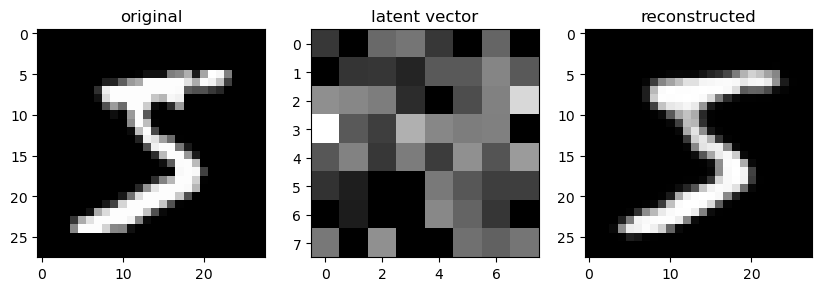

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(X_train[0],cmap='gray')
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(X_train_latent[0].reshape(8,8),cmap='gray')
plt.title('latent vector')

plt.subplot(1,3,3)
plt.imshow(reconstructed_X_train[0],cmap='gray')
plt.title('reconstructed')
plt.show()

In [9]:
print(X_train.shape)
print(X_train_latent.shape)
print(reconstructed_X_train.shape)

(60000, 28, 28)
(60000, 64)


In [25]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

model=Sequential()
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9340 - loss: 0.2224 - val_accuracy: 0.9608 - val_loss: 0.1296
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9706 - loss: 0.0969 - val_accuracy: 0.9669 - val_loss: 0.1186
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9797 - loss: 0.0678 - val_accuracy: 0.9695 - val_loss: 0.1234
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9841 - loss: 0.0525 - val_accuracy: 0.9732 - val_loss: 0.1156
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9866 - loss: 0.0441 - val_accuracy: 0.9739 - val_loss: 0.1178
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9886 - loss: 0.0377 - val_accuracy: 0.9750 - val_loss: 0.1074
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 0.9765 - val_loss: 0.1064
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9912 - loss: 0

In [26]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train_latent,y_train,batch_size=32,epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9030 - loss: 0.3079 - val_accuracy: 0.9528 - val_loss: 0.1533
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9503 - loss: 0.1569 - val_accuracy: 0.9588 - val_loss: 0.1356
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9600 - loss: 0.1259 - val_accuracy: 0.9530 - val_loss: 0.1600
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.1091 - val_accuracy: 0.9659 - val_loss: 0.1173
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9693 - loss: 0.0959 - val_accuracy: 0.9650 - val_loss: 0.1235
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9721 - loss: 0.0855 - val_accuracy: 0.9567 - val_loss: 0.1426
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9745 - loss: 0.0788 - val_accuracy: 0.9726 - val_loss: 0.1009
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9771 - loss: 0.0733 - 

In [27]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train_latent,y_train,batch_size=32,epochs=15,validation_split=.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9030 - loss: 0.3079 - val_accuracy: 0.9528 - val_loss: 0.1533
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9503 - loss: 0.1569 - val_accuracy: 0.9588 - val_loss: 0.1356
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9600 - loss: 0.1259 - val_accuracy: 0.9530 - val_loss: 0.1600
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9665 - loss: 0.1091 - val_accuracy: 0.9659 - val_loss: 0.1173
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9693 - loss: 0.0959 - val_accuracy: 0.9650 - val_loss: 0.1235
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9721 - loss: 0.0855 - val_accuracy: 0.9567 - val_loss: 0.1426
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9745 - loss: 0.0788 - val_accuracy: 0.9726 - val_loss: 0.1009
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9771 - loss: 0.0733 -

In [28]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [30]:
img=img_to_array(load_img('3.png',color_mode='grayscale',target_size=(28,28)))
print(img.shape)
img=img.reshape(1,28,28)
print(img.shape)

(28, 28, 1)
(1, 28, 28)


In [31]:
img_latent=encoder_model.predict(img)
img_latent.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


(1, 64)

In [33]:
print(np.argmax(model.predict(img_latent)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3


In [34]:
from tensorflow.keras.datasets import fashion_mnist

In [45]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
X_train=X_train/255
X_test=X_test/255


In [37]:
X_train_latent=encoder_model.predict(X_train)
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train_latent,y_train,batch_size=32,epochs=15,validation_split=.2)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7490 - loss: 0.6692 - val_accuracy: 0.7967 - val_loss: 0.5492
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8015 - loss: 0.5296 - val_accuracy: 0.8109 - val_loss: 0.5122
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8142 - loss: 0.4941 - val_accuracy: 0.8211 - val_loss: 0.4852
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8236 - loss: 0.4688 - val_accuracy: 0.8236 - val_loss: 0.4823
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8311 - loss: 0.4498 - val_accuracy: 0.8322 - val_loss: 0.4550
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8375 - loss: 0.4334 - val_accuracy: 0.8269 - val_loss: 0.4758
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8403 - loss: 0.4208 - val_accuracy: 0.8238 - val_loss: 0.4806
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4m

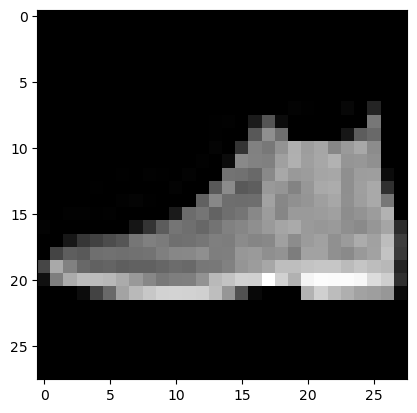

In [46]:
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [47]:
X_test_latent=encoder_model.predict(X_test[0].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [49]:
np.argmax(model.predict(X_test_latent))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


np.int64(9)